In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv(Path('Monarch_Watch_2019.csv'))
df.head()

,Tag Code,Date,City/Location,State/Province,ZIP/PC,Country,First Name,Notes
0,AAAA183,8/21/2019,Digby County,NS,B0W 2R0,CAN,Lisa,I have a Photo
1,AAAB212,9/1/2019,Briar Island,NS,B0V1H0,CAN,Cindy,"Near the coast while hiking the Island, I have..."
2,AAAC112,9/22/2019,Scarborough,ON,M1C 5G1,CAN,Laurie,NaN
3,AAAC908,10/5/2019,Geneva,OH,44041,USA,Samantha,Coast of Lake Erie
4,AAAE016,8/23/2019,Beaverton,ON,L0K1A0,CAN,Ryan,A camper killed the monarch as it was flying w...


In [3]:
# adding a column for year
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Tag Code,Date,City/Location,State/Province,ZIP/PC,Country,First Name,Notes,year
0,AAAA183,8/21/2019,Digby County,NS,B0W 2R0,CAN,Lisa,I have a Photo,2019
1,AAAB212,9/1/2019,Briar Island,NS,B0V1H0,CAN,Cindy,"Near the coast while hiking the Island, I have...",2019
2,AAAC112,9/22/2019,Scarborough,ON,M1C 5G1,CAN,Laurie,NaN,2019
3,AAAC908,10/5/2019,Geneva,OH,44041,USA,Samantha,Coast of Lake Erie,2019
4,AAAE016,8/23/2019,Beaverton,ON,L0K1A0,CAN,Ryan,A camper killed the monarch as it was flying w...,2019


In [4]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Tag Code,Date,City/Location,State/Province,ZIP/PC,Country,First Name,Notes,year,month
0,AAAA183,8/21/2019,Digby County,NS,B0W 2R0,CAN,Lisa,I have a Photo,2019,8
1,AAAB212,9/1/2019,Briar Island,NS,B0V1H0,CAN,Cindy,"Near the coast while hiking the Island, I have...",2019,9
2,AAAC112,9/22/2019,Scarborough,ON,M1C 5G1,CAN,Laurie,NaN,2019,9
3,AAAC908,10/5/2019,Geneva,OH,44041,USA,Samantha,Coast of Lake Erie,2019,10
4,AAAE016,8/23/2019,Beaverton,ON,L0K1A0,CAN,Ryan,A camper killed the monarch as it was flying w...,2019,8


In [5]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["month"]).count()
counts = counts.reset_index()
counts

,month,Tag Code,Date,City/Location,State/Province,ZIP/PC,Country,First Name,Notes,year
0,1,10,10,10,10,10,10,10,10,10
1,2,1,1,1,1,1,1,1,1,1
2,8,129,129,129,129,129,129,127,106,129
3,9,417,417,417,417,416,417,404,316,417
4,10,245,245,245,245,245,245,238,173,245
5,11,80,80,80,80,80,80,77,57,80
6,12,8,8,8,8,8,8,8,6,8


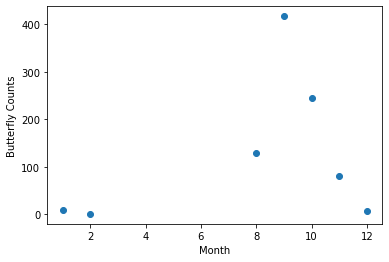

In [6]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
plt.scatter(counts.month, counts.Date)
plt.xlabel('Month')
plt.ylabel('Butterfly Counts')
plt.show()

In [7]:
# using reshape
X = counts.month.values.reshape(-1, 1)

In [8]:
# setting the y axis as the count of dates
y = counts.Date

In [9]:
# setting the model
model = LinearRegression()

In [10]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [11]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(7,)


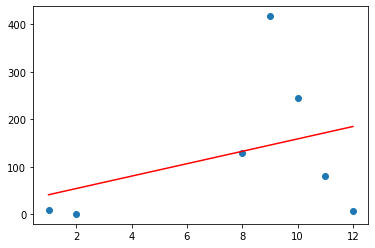

In [12]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [13]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (7, 3)


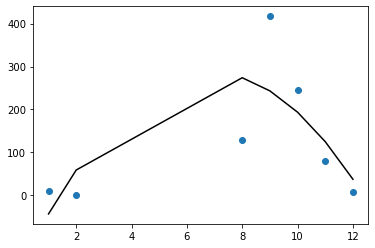

In [14]:
# two degree fit
fit_and_plot_poly_deg(2)

X_poly shape is: (7, 4)


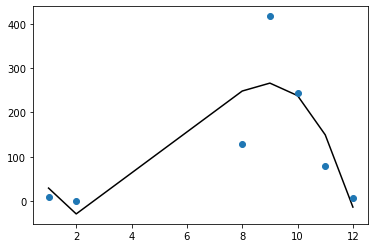

In [15]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

X_poly shape is: (7, 5)


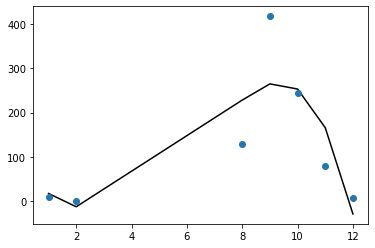

In [16]:
# 4th degree
fit_and_plot_poly_deg(4)